## Import Needed Classes

In [63]:

import statsmodels.api as sm
import sklearn.preprocessing as preprocessing
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline

In [6]:
def acc_report(y_test, y_pred):
    # Calculate accuracy 
    acc = accuracy_score(y_test,y_pred) * 100
    print('Accuracy is :{0}'.format(acc))

    # Check the AUC for predictions
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print('\nAUC is :{0}'.format(round(roc_auc, 2)))

    # Create and print a confusion matrix 
    print('\nConfusion Matrix')
    print('----------------')
    print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))

In [1]:
def plot_feature_importances(data_train, model):
    n_features = data_train.shape[1]
    plt.figure(figsize=(8,16))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), data_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

## Load Data for Modeling

In [8]:
#### Load Data for Modeling
import pandas as pd

data = pd.read_csv('./data/2018_model_data.csv')

In [9]:
data.drop(columns=['Unnamed: 0'],inplace=True)

## Create features, labels, training, and test data
# Build Baseline Model Random Forest


In [8]:
#### Create features, labels, training, and test data

In [12]:
# Split the dataset in the ratio train 80% and test 20%
X = data.drop("DELAYED", axis = 1)
y = data['DELAYED']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Train the classifier and make predictions

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [10]:
def run_randfor(Xtrain, ytrain, Xtest, **kwargs):
    # Build a regular tree as baseline
    forest = RandomForestClassifier(**kwargs )
    forest.fit(Xtrain, ytrain)
    # Make predictions for Train data
    ypred_train = forest.predict(Xtrain)
    # Make predictions for test data
    ypred_test = forest.predict(Xtest)
    return forest, ypred_train, ypred_test

In [30]:
#%%script echo skipping
# Build a regular tree as baseline
rf_clf1, y_pred_train1, y_pred_test1 = run_randfor(X_train_scaled, y_train,
                                                     X_test_scaled, 
                                                     random_state=10, 
                                                     criterion = 'gini',
                                                     class_weight={0:.2,1:.8},
                                                     n_estimators=30,
                                                     max_depth= 10,
                                   min_samples_leaf =12,
                                   min_samples_split = 50,n_jobs=12)

'n_estimators': [10, 30, 60],
    'criterion': ['gini'],
    'max_depth': [10],
    'min_samples_leaf': [30,35],
    'min_samples_split': [20, 30, 40],

## Check predictive performance

In [31]:
# Training accuracy score
rf_clf1.score(X_train_scaled, y_train)

0.6265383982136058

RF Train Score of 0.8038587297667191

In [32]:
# Test accuracy score
rf_clf1.score(X_test, y_test)

0.3442436123030696

RF TEST Score of 0.8029846983401764

In [34]:
#Check predictive performance
print(classification_report(y_test,y_pred_test1))

              precision    recall  f1-score   support

           0       0.85      0.65      0.74    312133
           1       0.27      0.52      0.35     76583

    accuracy                           0.63    388716
   macro avg       0.56      0.59      0.54    388716
weighted avg       0.73      0.63      0.66    388716



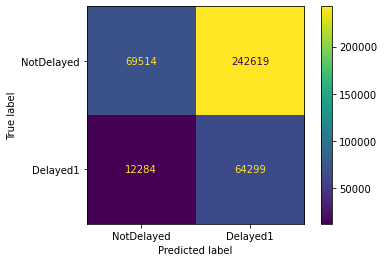

In [65]:
# Alternative confusion matrix
plot_confusion_matrix(rf_clf1, X_test, y_test, display_labels={'Delayed1', 'NotDelayed'}, values_format='.0f', )
plt.show()

In [ ]:
#Observation: Accuracy 74%  Precision 84% Recall 84% F1 

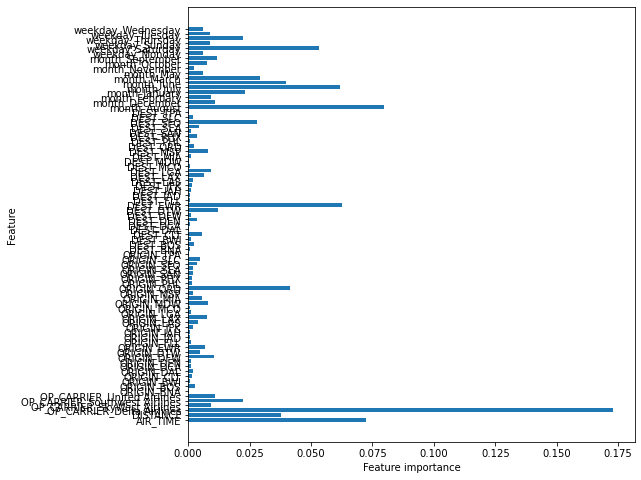

In [62]:
plot_feature_importances(X_train, rf_clf1)

# Build Model GridSearch Random Forest

## Train the classifier and make predictions

In [48]:
rf_clf = RandomForestClassifier()
mean_rf_cv_score = np.mean(cross_val_score(rf_clf, X_train_scaled, y_train, cv=3))

rf_param_grid = {
    'class_weight': ['balanced'],
    'n_estimators': [10],
    'criterion': ['gini'],
    'max_depth': [10],
    'min_samples_leaf': [20, 26],
    'min_samples_split': [30],
    'n_jobs': [12]
}

rf_grid_search = GridSearchCV(rf_clf, rf_param_grid, cv=3)
rf_grid_search.fit(X_train_scaled, y_train)

print(f"Training Accuracy: {rf_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {rf_grid_search.best_params_}")

Training Accuracy: 61.71%

Optimal Parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 20, 'min_samples_split': 30, 'n_estimators': 10, 'n_jobs': 12}


fIRST RUN Executed In 9 h 38 mins
Training Accuracy: 81.35%

Optimal Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 100}

sECOND rUN WITH OPTIMAL FROM dtrEE gs
executed in 1h 39m 25
Training Accuracy: 62.30%

Optimal Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 35, 'min_samples_split': 30, 'class_weight': 'balanced', 'n_estimators': 10}

Third Run
executed in 53m 37s, 
Training Accuracy: 61.71%

Optimal Parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 20, 'min_samples_split': 30, 'n_estimators': 10, 'n_jobs': 12}

# "Optimal" Random Forest

## Train the classifier and make predictions

In [52]:
# Build a regular tree as baseline
# Optimal Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 100}
forest_clf2 = RandomForestClassifier(random_state=10,  criterion='gini',
                                     class_weight='balanced',
                                     max_depth=65,
                                     min_samples_leaf=25,
                                     n_estimators=10,
                                     n_jobs=12)

forest_clf2.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=65,
                       min_samples_leaf=25, n_estimators=10, n_jobs=12,
                       random_state=10)

In [53]:
    # Make predictions for test data
y_pred_train2 = forest_clf2.predict(X_train_scaled)

In [54]:
#Check predictive performance Train
print(classification_report(y_train,y_pred_train2))

              precision    recall  f1-score   support

           0       0.88      0.67      0.76   1249891
           1       0.32      0.64      0.43    304973

    accuracy                           0.67   1554864
   macro avg       0.60      0.66      0.60   1554864
weighted avg       0.77      0.67      0.70   1554864



In [55]:
y_pred_test2 =forest_clf2.predict(X_test_scaled)

In [56]:
#Check predictive performance Test
print(classification_report(y_test,y_pred_test2))

              precision    recall  f1-score   support

           0       0.87      0.66      0.75    312133
           1       0.30      0.59      0.40     76583

    accuracy                           0.65    388716
   macro avg       0.58      0.62      0.57    388716
weighted avg       0.76      0.65      0.68    388716



In [58]:
acc_report(y_test, y_pred_test2)

Accuracy is :64.56564689902139

AUC is :0.62

Confusion Matrix
----------------
Predicted       0       1     All
True                             
0          205799  106334  312133
1           31405   45178   76583
All        237204  151512  388716


In [ ]:
#Observation: Accuracy 74%  Precision 84% Recall 84% F1 

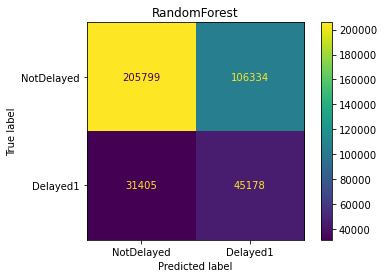

In [67]:
# Alternative confusion matrix
plot_confusion_matrix(forest_clf2, X_test_scaled, y_test, display_labels={'Delayed1', 'NotDelayed'}, values_format='.0f')
plt.title('RandomForest')
plt.show()